# Student Performance Analysis



### <u> Datasets </u>
This project uses the "Student Performance" datasets by P. Cortez and A. M. G Silva, available from https://archive.ics.uci.edu/dataset/320/student+performance. The datasets are copyright of Cortez and Silva, 2008, and are licensed under a CC BY 4.0 license. Please see the project's README file for further details relating to dataset licensing.

These datasets contain data about student performance in two Portuguese secondary schools, in two subjects: Portuguese Language and Mathematics.

### <u> Setup and initial overview </u>


In [1]:
# Import packages and libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn

#Setup

pd.set_option('display.max_columns', 999) # displays all columns in DataFrame.


In [2]:
# Import csv files.

math_df = pd.read_csv('student-mat.csv', sep=';')
por_df = pd.read_csv('student-por.csv', sep=';')

# Display the number of rows and columns for each of the tables.

math_rows = math_df.shape[0]
math_columns = math_df.shape[1]

por_rows = por_df.shape[0]
por_columns = por_df.shape[1]

print("The Mathematics dataset has {} rows and {} columns.".format(math_rows, math_columns))
print("The Portuguese language dataset has {} rows and {} columns.".format(por_rows, por_columns))

The Mathematics dataset has 395 rows and 33 columns.
The Portuguese language dataset has 649 rows and 33 columns.


From the above we can see that both the Portuguese Language and Mathematics datasets have the same number of columns.

The Portuguese language dataset is significantly larger than the Mathematics dataset.

In [3]:
#Create a dictionary to be used to give the features more descriptive names.
column_dict = {'school': 'School',
        'sex' : 'Sex',
        'age' : 'Age',
        'address': 'Urban/ Rural',
        'famsize' : 'Family Size',
        'Pstatus' : 'Parent Cohabit. Status',
        'Medu':'Mother Education',
        'Fedu': 'Father Education',
        'Mjob': 'Mother Job',
        'Fjob':'Father Job',
        'reason': 'School Choice Reason',
        'guardian' : 'Guardian',
        'traveltime' : 'Travel Time',
        'studytime' : 'Study Time',
        'failures': 'Past Failures',
        'schoolsup': 'School Ed. Support',
        'famsup':'Family Ed. Support',
        'paid' : 'Paid Classes',
        'activities': 'Extra-Curricular Activities',
        'nursery' : 'Attended Nursery',
        'higher' : 'Wants Higher Ed',
        'internet' : 'Internet Access',
        'romantic' : 'In Relationship',
        'famrel' : 'Family Relationship Quality',
        'freetime' : 'Free Time',
        'goout' : 'Goes Out Socially',
        'Dalc' : 'Weekday Alcohol Consumption',
        'Walc' : 'Weekend Alcohol Consumption',
        'health' : 'Health Status',
        'absences' : 'Absences'}

In [4]:
#Portuguese Language - display top 5 rows
no_of_rows = 5

print("The top {} rows of the Portuguese Langauge dataset are displayed as follows:".format(no_of_rows))
por_df.rename(columns = column_dict, inplace = True)
por_df.head(no_of_rows)


The top 5 rows of the Portuguese Langauge dataset are displayed as follows:


,School,Sex,Age,Urban/ Rural,Family Size,Parent Cohabit. Status,Mother Education,Father Education,Mother Job,Father Job,School Choice Reason,Guardian,Travel Time,Study Time,Past Failures,School Ed. Support,Family Ed. Support,Paid Classes,Extra-Curricular Activities,Attended Nursery,Wants Higher Ed,Internet Access,In Relationship,Family Relationship Quality,Free Time,Goes Out Socially,Weekday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
# Portuguese Language - display feature info

por_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   School                       649 non-null    str  
 1   Sex                          649 non-null    str  
 2   Age                          649 non-null    int64
 3   Urban/ Rural                 649 non-null    str  
 4   Family Size                  649 non-null    str  
 5   Parent Cohabit. Status       649 non-null    str  
 6   Mother Education             649 non-null    int64
 7   Father Education             649 non-null    int64
 8   Mother Job                   649 non-null    str  
 9   Father Job                   649 non-null    str  
 10  School Choice Reason         649 non-null    str  
 11  Guardian                     649 non-null    str  
 12  Travel Time                  649 non-null    int64
 13  Study Time                   649 non-null    int64
 14  Past 

In [6]:
por_df["Study Time"].value_counts()

Study Time
2    305
1    212
3     97
4     35
Name: count, dtype: int64

&nbsp;

In [7]:
#Portuguese Language - summary statistics about numerical features
por_df.describe()

,Age,Mother Education,Father Education,Travel Time,Study Time,Past Failures,Family Relationship Quality,Free Time,Goes Out Socially,Weekday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


&nbsp;


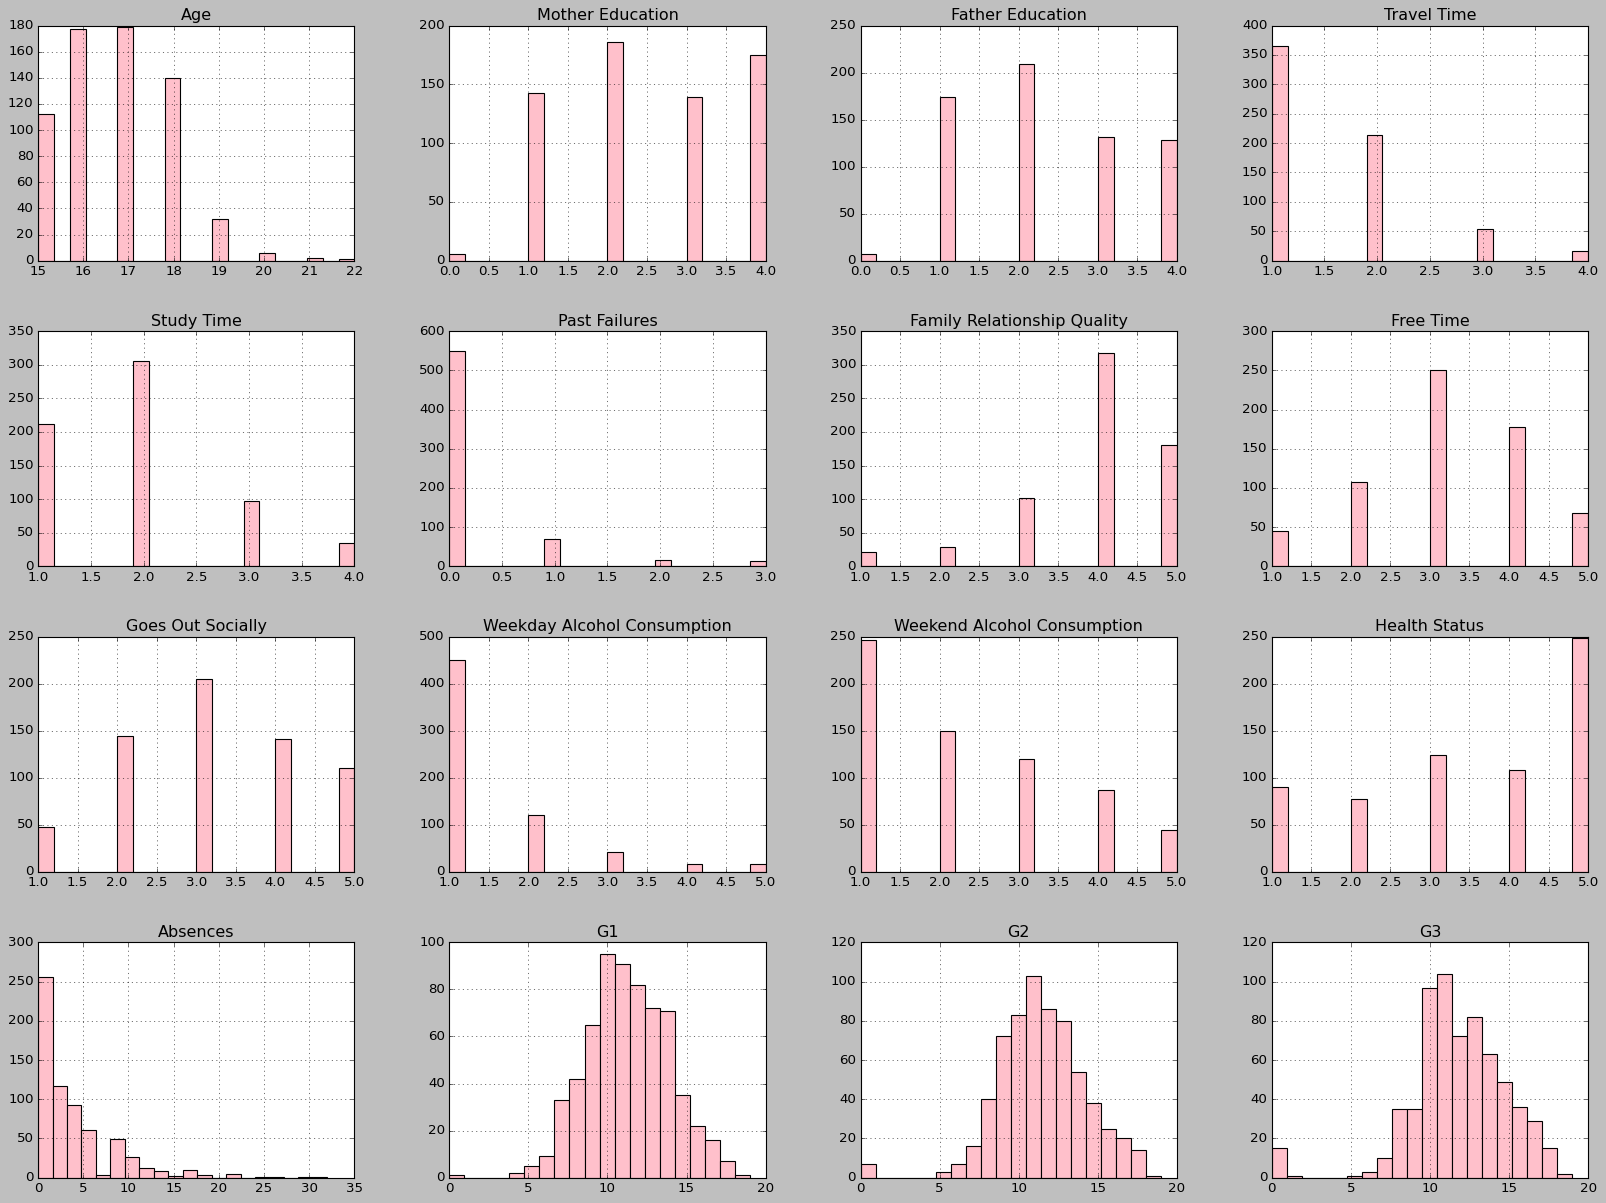

In [8]:
# Portuguese Language - histograms for numerical features
mpl.style.use('classic')
por_df.hist(bins = 20, figsize = (25, 18), color = 'pink')
plt.show()

The histograms show that most, but not all, of the numerical features are ordinal, and have similar ranges. The "Absences" feature has the largest range; it is also tail-heavy.

A proportion of student grades (features "G1", "G2" and "G3") have a value of zero. The histograms show that the number of students with a zero grade is much higher than those who achieved grades between 1 and 4; possible reasons for this should be explored.

Correlations may exist between some predictor variables, including qualitative ones which are not shown on the histograms (e.g. between parents' education level and whether students receive paid lessons).

&nbsp;

In [9]:
# Mathematics - top 5 rows
print("The top {} rows of the Mathematics dataset are displayed as follows:".format(no_of_rows))
math_df.rename(columns = column_dict, inplace = True)
math_df.head(no_of_rows)

The top 5 rows of the Mathematics dataset are displayed as follows:


,School,Sex,Age,Urban/ Rural,Family Size,Parent Cohabit. Status,Mother Education,Father Education,Mother Job,Father Job,School Choice Reason,Guardian,Travel Time,Study Time,Past Failures,School Ed. Support,Family Ed. Support,Paid Classes,Extra-Curricular Activities,Attended Nursery,Wants Higher Ed,Internet Access,In Relationship,Family Relationship Quality,Free Time,Goes Out Socially,Weekday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


&nbsp;


In [10]:
# Mathematics - display feature info
math_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   School                       395 non-null    str  
 1   Sex                          395 non-null    str  
 2   Age                          395 non-null    int64
 3   Urban/ Rural                 395 non-null    str  
 4   Family Size                  395 non-null    str  
 5   Parent Cohabit. Status       395 non-null    str  
 6   Mother Education             395 non-null    int64
 7   Father Education             395 non-null    int64
 8   Mother Job                   395 non-null    str  
 9   Father Job                   395 non-null    str  
 10  School Choice Reason         395 non-null    str  
 11  Guardian                     395 non-null    str  
 12  Travel Time                  395 non-null    int64
 13  Study Time                   395 non-null    int64
 14  Past 

In [11]:
# Mathematics - summary statistics about numerical features

math_df.describe()


,Age,Mother Education,Father Education,Travel Time,Study Time,Past Failures,Family Relationship Quality,Free Time,Goes Out Socially,Weekday Alcohol Consumption,Weekend Alcohol Consumption,Health Status,Absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


&nbsp;

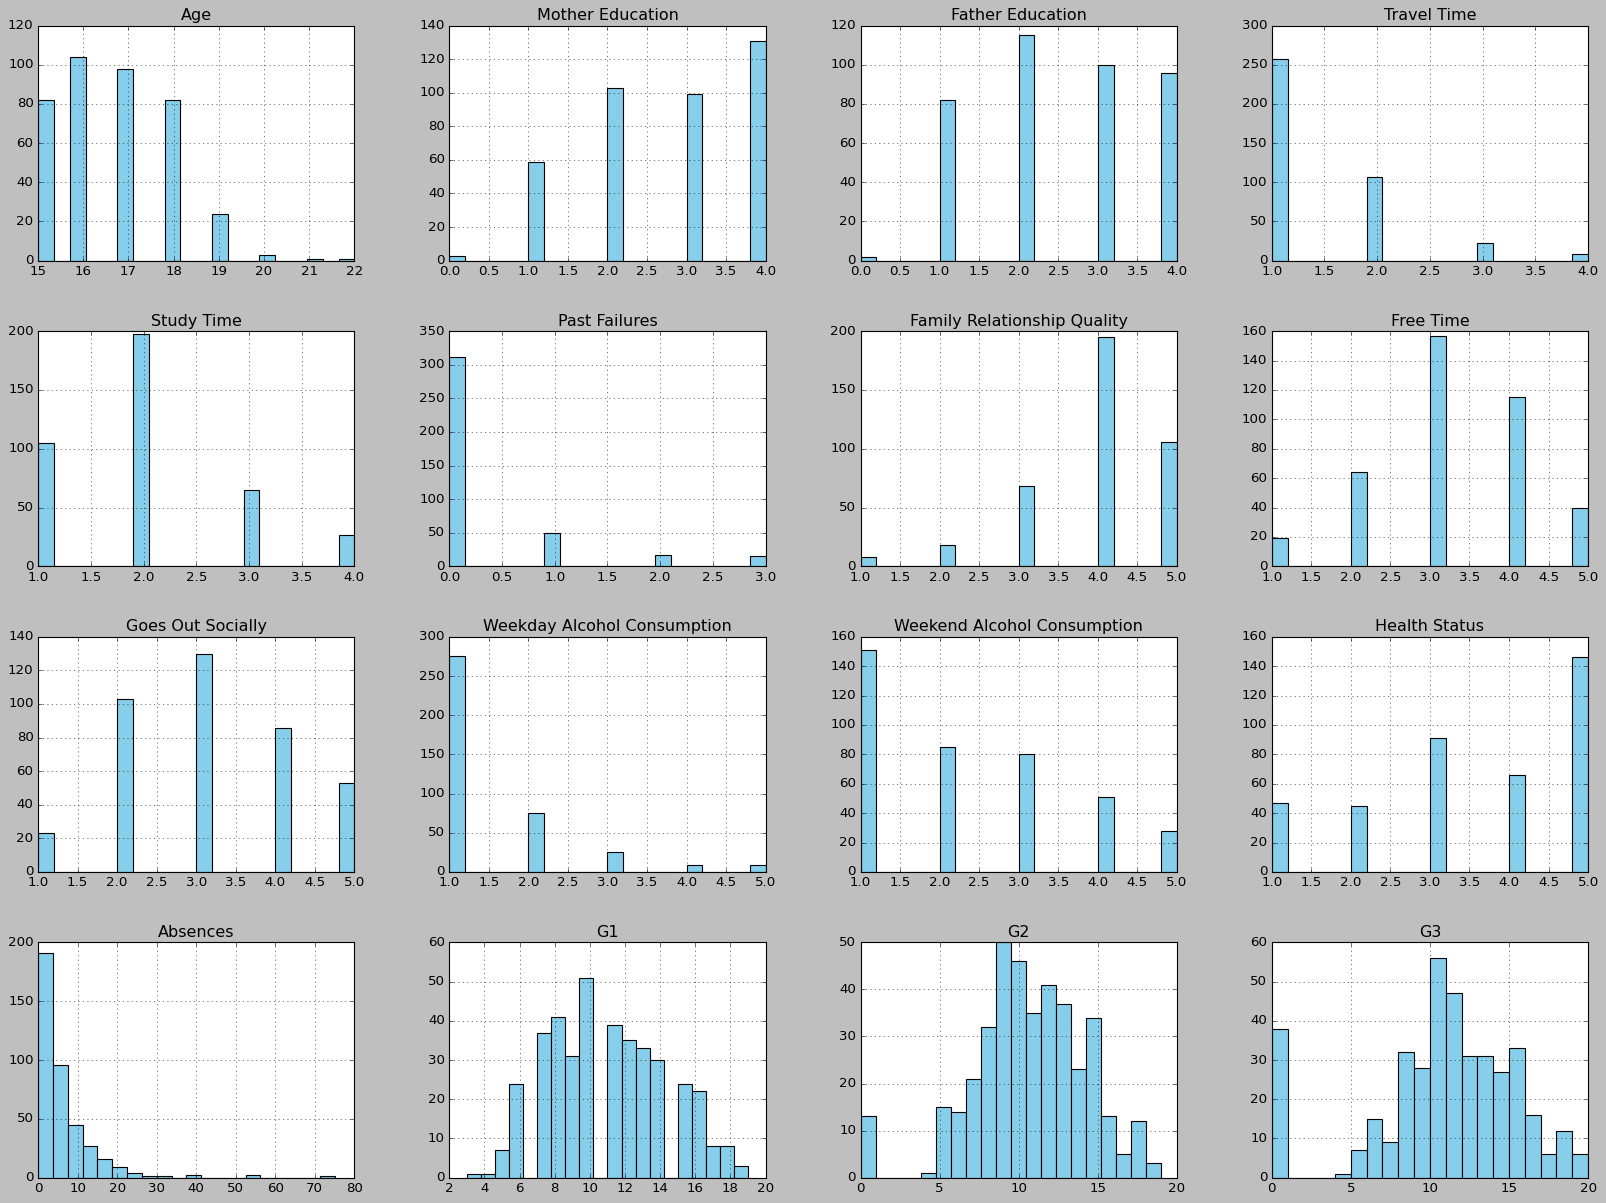

In [12]:
# Mathematics - histograms for numerical features
mpl.style.use('classic')
math_df.hist(bins=20, figsize=(25,18), color='skyblue')
plt.show()

Firstly, we consider student grades ("G1", "G2" and "G3"). Looking at the histograms, there appears to be a higher variation in grades for Mathematics compared to the Portuguese Language grades seen previously; the summary statistics show that the standard deviation is 4.58 for Mathematics, compared to 3.23 for Portuguese Language, for "G3".

As was the case with the Portuguese Language data, most, but not all, numerical variables are ordinal, and have similar scales. One exception is the "Absences" variable, which has the largest range and is tail-heavy.

As with the Portuguese Language data, some students have received grades of zero in Mathematics, which is much higher than students receiving grades 1-4. However, there is a higher number of students with a grade of zero in Mathematics  than for Portuguese Language; this is also unexpected, as there are fewer data instances for Mathematics than there are for the Portuguese Language.

As with the Portuguese Language data, correlations between some predictor variables are likely.

&nbsp;
